In [1]:
import pandas as pd
import os

tree = os.walk('data')

for item in tree:
    print(item)

tree = os.walk('data')
data_files = []
target_file = 'data.csv'

for item in tree:
    files = item[-1]
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[1:3]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)


('data', ['2020-12-06', '2020-12-08', '2020-12-09', '2020-12-07', '2020-12-05', '2020-12-03', '2020-12-04'], [])
('data/2020-12-06', ['Vasiliy_Fedorov'], [])
('data/2020-12-06/Vasiliy_Fedorov', [], ['data.csv'])
('data/2020-12-08', ['Alexey_Fedorov', 'Anton_Smirnov', 'Kirill_Smirnov', 'Rostislav_Petrov', 'Petr_Petrov'], [])
('data/2020-12-08/Alexey_Fedorov', [], ['data.csv'])
('data/2020-12-08/Anton_Smirnov', [], ['data.csv'])
('data/2020-12-08/Kirill_Smirnov', [], ['data.csv'])
('data/2020-12-08/Rostislav_Petrov', [], ['data.csv'])
('data/2020-12-08/Petr_Petrov', [], ['data.csv'])
('data/2020-12-09', ['Anton_Ivanov', 'Anton_Smirnov', 'Rostislav_Petrov', 'Petr_Fedorov', 'Alexey_Smirnov', 'Anton_Petrov', 'Vasiliy_Ivanov'], [])
('data/2020-12-09/Anton_Ivanov', [], ['data.csv'])
('data/2020-12-09/Anton_Smirnov', [], ['data.csv'])
('data/2020-12-09/Rostislav_Petrov', [], ['data.csv'])
('data/2020-12-09/Petr_Fedorov', [], ['data.csv'])
('data/2020-12-09/Alexey_Smirnov', [], ['data.csv'])
('

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_65908/651674816.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
import pandas as pd
import os


tree = os.walk('data')
data_files = []
target_file = 'data.csv'

for item in tree:
    files = item[-1]
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[1:3]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

combined_df = pd.concat(data_files_df, ignore_index=True)

combined_df.to_csv('data.csv', index=False)


2.	Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [20]:
import pandas as pd


df = pd.read_csv('data.csv')

group_user = df.groupby('name')['quantity'].sum()

count = group_user.max()
users = group_user[group_user == count].index

if len(users) == 1:
    print(users[0], count)
else:
    users_sorted = sorted(users)
    users_str = ', '.join(users_sorted)
    print(users_str, count)

Alexey_Smirnov, Petr_Smirnov 52


3.	Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

Топ 10 товаров по продажам
product_id
27    20
56    18
24    15
74    15
41    14
34    13
94    13
66    13
92    12
50    12
Name: quantity, dtype: int64
product_id = 56: 18


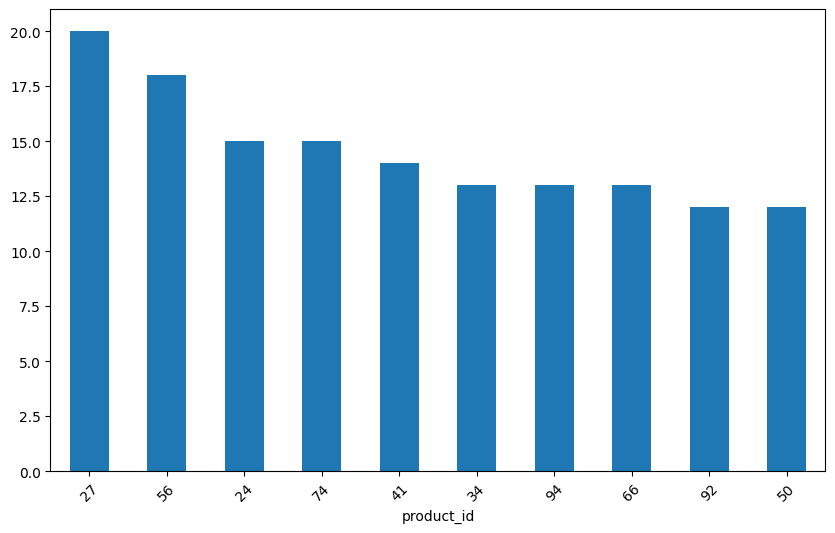

In [41]:
import matplotlib as plt
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

print('Топ 10 товаров по продажам')
print(top_products)
top_products.plot(kind='bar', figsize=(10, 6))

quantity_product_56 = df[df['product_id'] == 56]['quantity'].sum()
print(f"product_id = 56: {quantity_product_56}")


4.	Визуализируйте продажи по дням.

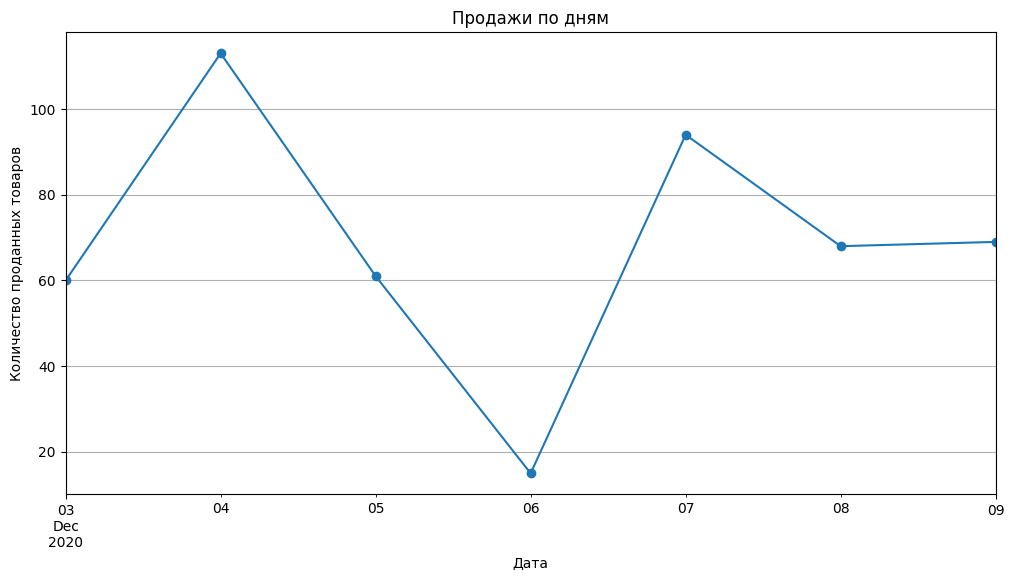

In [37]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

daily_sales = df.groupby('date')['quantity'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot(marker='o')
plt.title('Продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Количество проданных товаров')
plt.grid(True)
plt.show()


5.	Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [33]:

df['date'] = pd.to_datetime(df['date'])

x = df.groupby(['name', 'product_id'])['date'].nunique()

answer = x[x > 1]

print(f"Количество: {len(answer)}")

Количество: 2
